In [1]:
# for first in range(3,4):
#         for second in range(1,6):
#             with open('SLDRanges'+str(first)+str(second)+'.npy', 'wb') as f:

#                 curves_SLD = np.load('../SLD_CurvesPoly'+str(first)+str(second)+'.npy')

#                 x_points = []
#                 y_points = []
#                 for curve in curves_SLD:
#                     x_points.append(curve[0])
#                     y_points.append(curve[1])
#                 # breaker = 0
#                 # # print(y_points[0])
#                 # for i in range(1,len(y_points[0])):
#                 #     if y_points[0][i]-y_points[0][i-1] != 0:
#                 #         breaker = i
#                 #         break
#                 # print(breaker)
#                 min_valX = float('inf')
#                 min_valY = float('inf')
#                 max_valX = -float('inf')
#                 max_valY = -float('inf')
#                 for i in range(len(y_points)):
#                     min_valX = min(min(x_points[i]), min_valX)
#                     min_valY = min(min(y_points[i]), min_valY)
#                     max_valX = max(max(x_points[i]), max_valX)
#                     max_valY = max(max(y_points[i]), max_valY)
#                 np.save(f, np.array([min_valX, max_valX, min_valY, max_valY]))
#             # np.save(f, np.array([1, 3]))

In [2]:
!git clone https://github.com/miguel-fc/Neutron_Reflect.git

fatal: destination path 'Neutron_Reflect' already exists and is not an empty directory.


In [3]:
cd Neutron_Reflect

/global/u1/q/qubri000/Neutron_Reflect


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import numpy as np
import data_preparation as dpre
import io
import os
# import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline
import seaborn as sea

In [5]:
pip install refl1d

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install ipympl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
# plt.cla()
import refl1d
from refl1d.names import *

def calculate_reflectivity_from_profile(q, z_step, sld, q_resolution=0.0294855):

    """

        Reflectivity calculation using refl1d from an array of microslabs

    """

    # sld = np.flip(sld)
    zeros = np.zeros(len(q))
    dq = q_resolution * q / 2.355
    # The QProbe object represents the beam

    probe = QProbe(q, dq, data=(zeros, zeros))
    sample = Slab(material=SLD(name='back', rho=sld[0], irho=0), interface=0)
    # Add each layer
    _prev_z = z_step[0]
    for i, _sld in enumerate(sld):
        if i>0:
            thickness = z_step[i] - _prev_z
            sample = sample | Slab(material=SLD(name='l_%d' % i, rho=_sld, irho=0),
                                                thickness=thickness,
                                                interface=0)
        _prev_z = z_step[i]
    probe.background = Parameter(value=0, name='background')
    expt = Experiment(probe=probe, sample=sample)
    a, r = expt.reflectivity()
    return a, r

In [8]:
import gdown
gdown.download_folder("https://drive.google.com/drive/u/0/folders/10zAh8Dqr9c-vSflP35e6KFh54XdYQ-mr")

Retrieving folder list


Processing file 13Q-t2MVk1QKjbHKuaNfd8XJMZyRwdSZD np_out_REFL_202253_combined_data_auto.npy
Processing file 13bYUtviYYUz-DJX5UD54k30qwcWctSZM np_out_REFL_202265_combined_data_auto.npy
Processing file 12duFka2wV6OAownYmuTCsZ5DUzQo4oER np_out_REFL_202272_combined_data_auto.npy
Processing file 12qmDNxKPaeQVXJzgkqCaXaqylgYHPS0r np_out_REFL_202279_combined_data_auto.npy
Processing file 12wg50lq7tyx9jJab56c7vD1iSEGHApVI np_out_REFL_202286_combined_data_auto.npy
Processing file 12gUBY9W4knU-dhVmy0pTBvgOtwHQFQY9 np_out_REFL_202293_combined_data_auto.npy
Processing file 136hrFhuvu7HZTesVx6CqAg13sPwyZAwv np_out_REFL_202300_combined_data_auto.npy
Processing file 12NQ2GN4h-Ek_txO16mkngzDSA4u9Jia2 np_out_REFL_202307_combined_data_auto.npy
Processing file 13AZnvsSmMLIn5WwImrKGnHPs3C5h-UlX np_out_REFL_202314_combined_data_auto.npy
Processing file 13zt4u3qCW37cwgx2njvtplc9l8NQ1Pxk np_out_REFL_202342_combined_data_auto.npy
Processing file 12J0iClc4ybqa35dFUG4lqFP7ur7mahhy np_out_REFL_202349_combined_da

Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=13Q-t2MVk1QKjbHKuaNfd8XJMZyRwdSZD
To: /global/u1/q/qubri000/Neutron_Reflect/npoutputsPoly/np_out_REFL_202253_combined_data_auto.npy
100%|██████████| 5.06k/5.06k [00:00<00:00, 21.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=13bYUtviYYUz-DJX5UD54k30qwcWctSZM
To: /global/u1/q/qubri000/Neutron_Reflect/npoutputsPoly/np_out_REFL_202265_combined_data_auto.npy
100%|██████████| 5.06k/5.06k [00:00<00:00, 18.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=12duFka2wV6OAownYmuTCsZ5DUzQo4oER
To: /global/u1/q/qubri000/Neutron_Reflect/npoutputsPoly/np_out_REFL_202272_combined_data_auto.npy
100%|██████████| 5.06k/5.06k [00:00<00:00, 18.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=12qmDNxKPaeQVXJzgkqCaXaqylgYHPS0r
To: /global/u1/q/qubri000/Neutron_Reflect/npoutputsPoly/np_out_REFL_202279_combined_data_auto.npy
100%|██████████| 5.06k/5.06k [00:00<00:00, 

['/global/u1/q/qubri000/Neutron_Reflect/npoutputsPoly/np_out_REFL_202253_combined_data_auto.npy',
 '/global/u1/q/qubri000/Neutron_Reflect/npoutputsPoly/np_out_REFL_202265_combined_data_auto.npy',
 '/global/u1/q/qubri000/Neutron_Reflect/npoutputsPoly/np_out_REFL_202272_combined_data_auto.npy',
 '/global/u1/q/qubri000/Neutron_Reflect/npoutputsPoly/np_out_REFL_202279_combined_data_auto.npy',
 '/global/u1/q/qubri000/Neutron_Reflect/npoutputsPoly/np_out_REFL_202286_combined_data_auto.npy',
 '/global/u1/q/qubri000/Neutron_Reflect/npoutputsPoly/np_out_REFL_202293_combined_data_auto.npy',
 '/global/u1/q/qubri000/Neutron_Reflect/npoutputsPoly/np_out_REFL_202300_combined_data_auto.npy',
 '/global/u1/q/qubri000/Neutron_Reflect/npoutputsPoly/np_out_REFL_202307_combined_data_auto.npy',
 '/global/u1/q/qubri000/Neutron_Reflect/npoutputsPoly/np_out_REFL_202314_combined_data_auto.npy',
 '/global/u1/q/qubri000/Neutron_Reflect/npoutputsPoly/np_out_REFL_202342_combined_data_auto.npy',
 '/global/u1/q/qubri

In [9]:
# gdown.download_folder("https://drive.google.com/drive/u/0/folders/1aSvjQVGO2NW5EoeB8NO481NCKetYx9wf")

np_out_REFL_202413_combined_data_auto.npy
np_out_REFL_202468_combined_data_auto.npy
np_out_REFL_202369_combined_data_auto.npy
np_out_REFL_202437_combined_data_auto.npy
np_out_REFL_202272_combined_data_auto.npy
np_out_REFL_202349_combined_data_auto.npy
np_out_REFL_202461_combined_data_auto.npy
np_out_REFL_202356_combined_data_auto.npy
np_out_REFL_202406_combined_data_auto.npy
npoutputsPoly/np_out_REFL_202406_combined_data_auto.npy
np_out_REFL_202253_combined_data_auto.npy
np_out_REFL_202454_combined_data_auto.npy
np_out_REFL_202382_combined_data_auto.npy
np_out_REFL_202286_combined_data_auto.npy
np_out_REFL_202293_combined_data_auto.npy
np_out_REFL_202394_combined_data_auto.npy
np_out_REFL_202300_combined_data_auto.npy
np_out_REFL_202265_combined_data_auto.npy
np_out_REFL_202279_combined_data_auto.npy
np_out_REFL_202342_combined_data_auto.npy
np_out_REFL_202307_combined_data_auto.npy
np_out_REFL_202425_combined_data_auto.npy
np_out_REFL_202314_combined_data_auto.npy


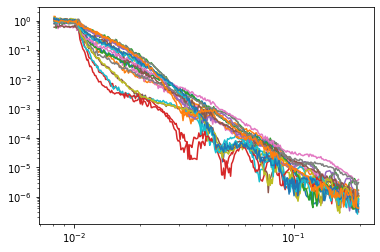

(22, 2, 308)


In [10]:

import os
directory = "npoutputsPoly/"
totalDataPoly = []
parametersPoly = []
count = 0
for i,filename in enumerate(os.listdir(directory)):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        print(f[14:])
    currData = np.load(directory +f[14:])
    xptPoly = []
    yptPoly = []
    parametersPoly.append([])
    # print(f)
    for j in range(10):
        parametersPoly[count].append(int(f[26:32]))
    for j in range(len(currData)):
      xptPoly.append(currData[j][0])
      yptPoly.append(currData[j][1])
    np.array(xptPoly)
    np.array(yptPoly)
    # xpt2 = np.log10(xpt2)
    # ypt2 = np.log10(ypt2)
    totalDataPoly.append([xptPoly,yptPoly])
    # print(xptPoly)
    if i == 8:
      print(f)
    count += 1
totalDataPoly = np.stack(totalDataPoly)
for x in range(len(totalDataPoly)):
  plt.plot(totalDataPoly[x][0],totalDataPoly[x][1])
plt.xscale('log')
plt.yscale('log')
plt.show()
# print(totalDataPoly)
print(totalDataPoly.shape)
totalDataPoly = np.log10(totalDataPoly)
# for i in range(len(totalDataPoly)):
#     newTestingData = []
#     for j in range(len(totalDataPoly[i][0])):
#       newTestingData.append([totalDataPoly[i][0][j], totalDataPoly[i][1][j]])
#     for j in range(50):
#       newTestingData.append([totalDataPoly[i][-1][0], totalDataPoly[i][-1][1]])
#     newTestingData = np.stack(newTestingData)
#     print(newTestingData.shape)
#     window_size = 7
#     smoothed_data = smooth_points(newTestingData, window_size)
#     x_points = []
#     y_points = []
#     for j in range(len(newTestingData)):
#         x_points
#     totalDataPoly[i] = smoothed_data

In [11]:
class CNN(nn.Module):
    def __init__(self, num_layers):
        super(CNN, self).__init__()
        self.layers = nn.ModuleList()
        addition = 255/num_layers
        curr = 1
        for hdim in range(num_layers-1):
            self.layers.append(nn.Conv1d(int(curr+0.5), int(curr+addition+0.5),51,padding=25))
            self.layers.append(nn.BatchNorm1d(int(curr+addition+0.5)))
            self.layers.append(nn.ReLU(True))
            curr += addition
        self.layers.append(nn.Conv1d(int(curr+0.5), 256, 51, padding=25))
        
#         self.conv1 = nn.Conv1d(1,13,51,padding=25)
#         self.batch1 = nn.BatchNorm1d(13)
#         self.relu1 = nn.ReLU(True)
        
#         self.conv2 = nn.Conv1d(13,25,51,padding=25)
#         self.batch2 = nn.BatchNorm1d(25)
#         self.relu2 = nn.ReLU(True)
        
#         self.conv3 = nn.Conv1d(25,38,51,padding=25)
#         self.batch3 = nn.BatchNorm1d(38)
#         self.relu3 = nn.ReLU(True)
        
#         self.conv4 = nn.Conv1d(38,50,51,padding=25) 
#         self.batch4 = nn.BatchNorm1d(50)
#         self.relu4 = nn.ReLU(True)
        
#         self.conv5 = nn.Conv1d(50,64,51,padding=25) 
#         self.batch5 = nn.BatchNorm1d(64)
#         self.relu5 = nn.ReLU(True)
        
        self.linear1 = nn.Linear(256*308,900*2)
        # self.linear2 = nn.Linear(120*308,2*308)
        # self.linear2 = nn.Linear(33*308, 2*308)
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        # x = self.batch5(x)
        # x = self.relu5(x)
        # print(x.shape)
        x = x.reshape(x.shape[0], -1)
        x = self.linear1(x)
        # x = self.linear2(x)
        # x = self.linear2(x)
        x = x.reshape(-1, 2, 900)
        # print(x.shape)
        return torch.sigmoid(x)

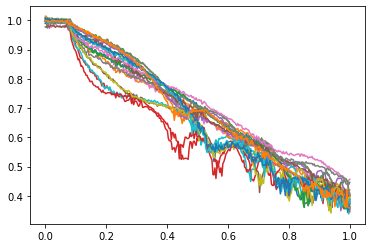

In [12]:
with open('NRRanges.npy', 'rb') as f:
    min_valXNR, max_valXNR, min_valYNR, max_valYNR = np.load(f)
x_pointsPoly = []
y_pointsPoly = []
for curve in totalDataPoly:
    x_pointsPoly.append(curve[0])
    y_pointsPoly.append(curve[1])
# min_valXPoly = float('inf')
# min_valYPoly = float('inf')
# max_valXPoly = -float('inf')
# max_valYPoly = -float('inf')
# for i in range(len(y_pointsPoly)):
#     min_valXPoly = min(min(x_pointsPoly[i]), min_valXPoly)
#     min_valYPoly = min(min(y_pointsPoly[i]), min_valYPoly)
#     max_valXPoly = max(max(x_pointsPoly[i]), max_valXPoly)
#     max_valYPoly = max(max(y_pointsPoly[i]), max_valYPoly)
for i in range(len(y_pointsPoly)):
    for j in range(len(y_pointsPoly[0])):
        x_pointsPoly[i][j] -= min_valXNR
        y_pointsPoly[i][j] -= min_valYNR
        x_pointsPoly[i][j] /= (max_valXNR - min_valXNR)
        y_pointsPoly[i][j] /= (max_valYNR - min_valYNR)
totalDataPoly2 = []
for i in range(len(y_pointsPoly)):
    totalDataPoly2.append([x_pointsPoly[i],y_pointsPoly[i]])
totalDataPoly2 = np.stack(totalDataPoly2)
totalDataPoly2.shape
# for x in range(totalDataPoly.shape[0]):
#   plt.plot(totalDataPoly[x][0],totalDataPoly[x][1])
# for i in range(len(totalDataPoly)):
#     diff = 1-totalDataPoly[i][1][0]
#     print(diff)
#     for j in range(len(totalDataPoly[0][0])):
#         totalDataPoly[i][1][j] += diff
for x in range(totalDataPoly.shape[0]):
  plt.plot(totalDataPoly[x][0],totalDataPoly[x][1])

In [13]:
# totalDataPoly_log[:,0,:] = (totalDataPoly_log[:,0,:] - x_min)/(x_max - x_min)
# totalDataPoly_log[:,1,:] = (totalDataPoly_log[:,1,:] - y_min)/(y_max - y_min)
# for x in range(len(totalDataPoly_log)):
#   plt.plot(totalDataPoly_log[x][0],totalDataPoly_log[x][1])
# plt.show()
totalDataPoly.shape
RPoly = totalDataPoly[:,1]
# parametersPoly = []
# for i in range(21):
#   parametersPoly.append([0,0,0,0,0,0,0,0,0,0,0,0,0])
parametersPoly = np.stack(parametersPoly)
batch_size=64
RPoly_m = RPoly[:,np.newaxis,:]
xtrainPoly, ytrainPoly, xvalPoly, yvalPoly, xtestPoly, ytestPoly = \
dpre.split_input_arrays(RPoly_m,parametersPoly, size_split=0.9)
#Prepare data files, continuation
train_datasetPoly, valid_datasetPoly, test_datasetPoly, train_loaderPoly, valid_loaderPoly, test_loaderPoly = \
dpre.get_dataloaders_fromsplitarrays(xtrainPoly,ytrainPoly,xvalPoly,yvalPoly,xtestPoly,ytestPoly,batch_size=batch_size)
print(train_datasetPoly)

xtrain.shape, ytrain.shape, xval.shape, yval.shape, xtest.shape, ytest.shape
(19, 1, 308) (19, 10) (1, 1, 308) (1, 10) (2, 1, 308) (2, 10)


In [14]:
from sklearn.metrics import mean_squared_error
import copy
def binary_search(start, end, data, curve, iterations):
    # print('hello', start, end)
    if start>=end:
        return end
    curve1 = copy.deepcopy(curve)
    for i in range(len(curve1)):
        curve1[i] += start
    curve2 = copy.deepcopy(curve)
    for i in range(len(curve2)):
        curve2[i] += end
    # print(curve1)
    plt.plot(np.logspace(np.log10(0.008101436040354381), np.log10(0.1975709062238298), num=308),data)
    plt.plot(np.logspace(np.log10(0.008101436040354381), np.log10(0.1975709062238298), num=308),curve)
    plt.yscale('log')
    plt.show()
    data1 = copy.deepcopy(data)
    curve1 = np.log10(curve1)
    curve2 = np.log10(curve2)
    data1 = np.log10(data1)
    # print(curve1)
    # min_valYNR = float('inf')
    # max_valYNR = -float('inf')
    # for i in range(len(y_points)):
    #     min_valYNR = min(min(y_points[i]), min_valYNR)
    #     max_valYNR = max(max(y_points[i]), max_valYNR)
    # for i in range(len(curve1)):
    #     curve1[i] -= min_valYNR
    #     curve1[i] /= (max_valYNR - min_valYNR)
    #     curve2[i] -= min_valYNR
    #     curve2[i] /= (max_valYNR - min_valYNR)
    #     data1[i] -= min_valYNR
    #     data1[i] /= (max_valYNR - min_valYNR)
    # print(curve1)
    # print(mean_squared_error(data1,curve1))
    if iterations > 500:
        if mean_squared_error(data1, curve2) > mean_squared_error(data1,curve1):
            return start
        else:
            return end
    if mean_squared_error(data1, curve2) > mean_squared_error(data1,curve1):
        return binary_search(start,(start+end)/2, data, curve, iterations+1)
    else:
        return binary_search((start+end)/2,end, data, curve, iterations+1)

tensor(202314.)


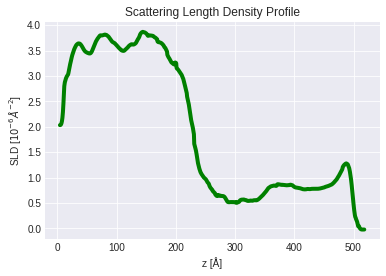

308


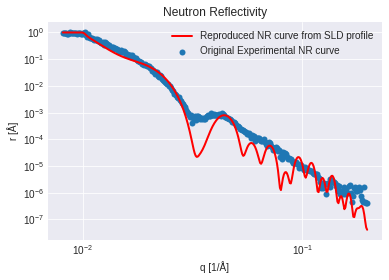

tensor(202468.)


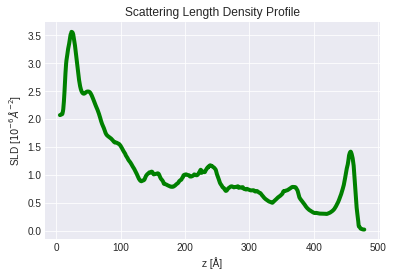

308


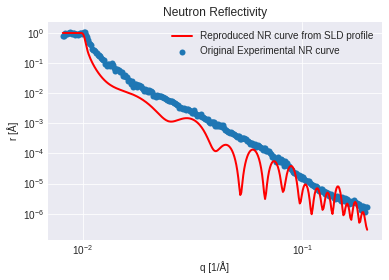

tensor(202413.)


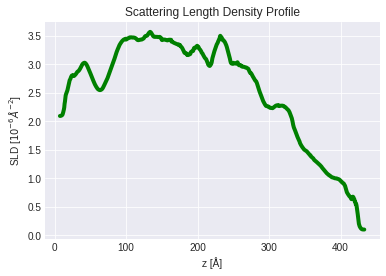

308


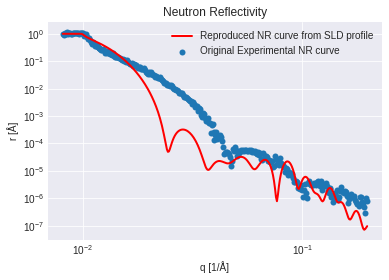

tensor(202300.)


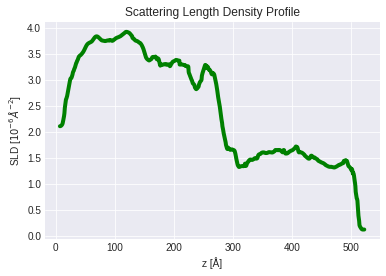

308


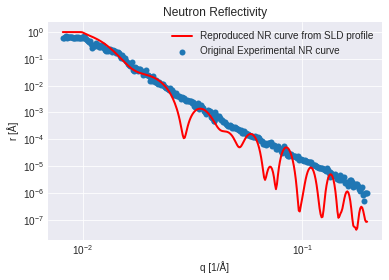

tensor(202307.)


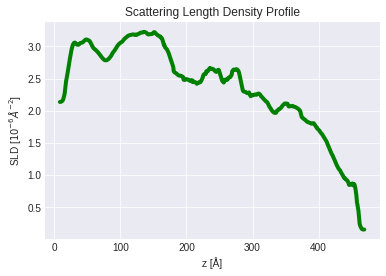

308


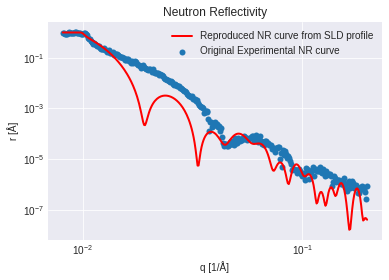

tensor(202356.)


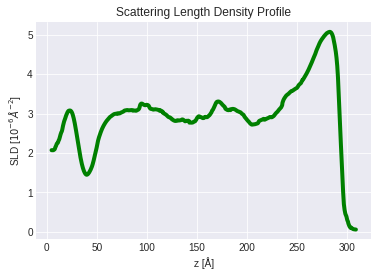

308


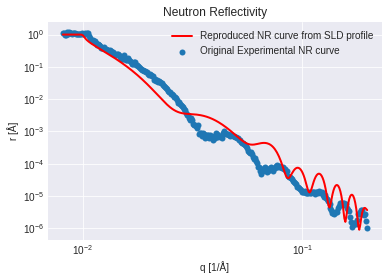

tensor(202437.)


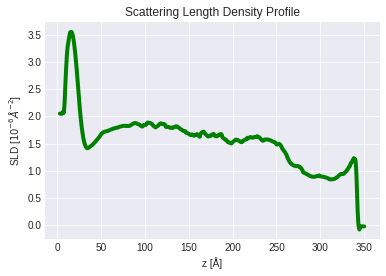

308


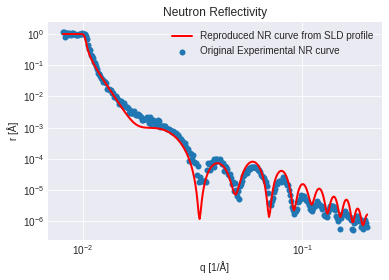

tensor(202369.)


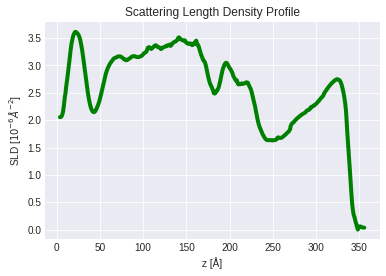

308


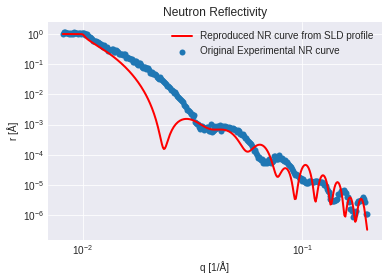

tensor(202425.)


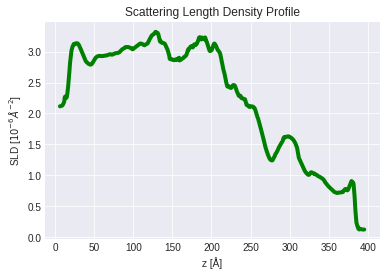

308


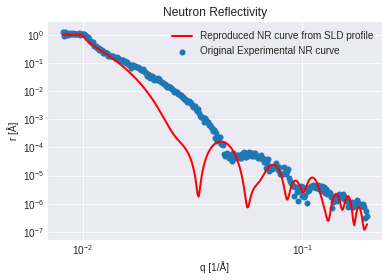

tensor(202382.)


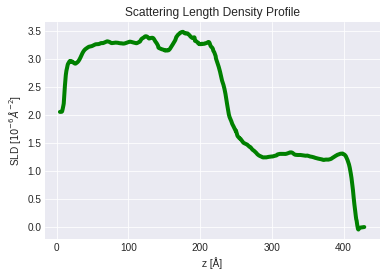

308


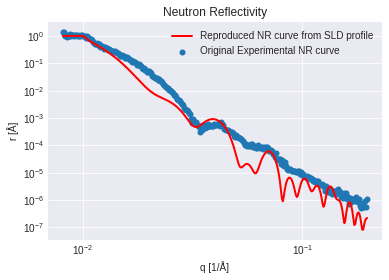

tensor(202349.)


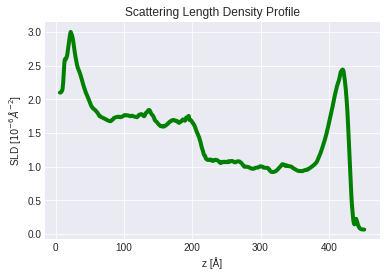

308


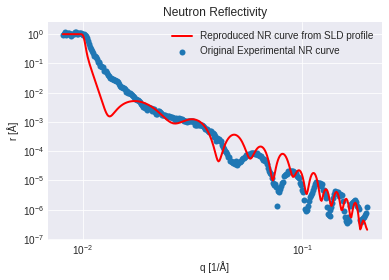

tensor(202286.)


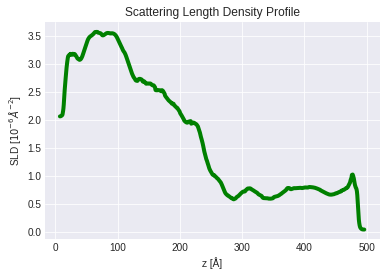

308


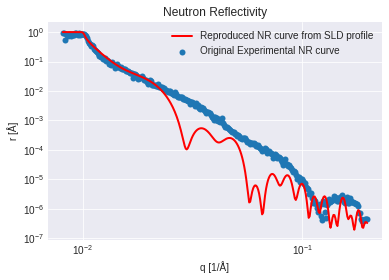

tensor(202265.)


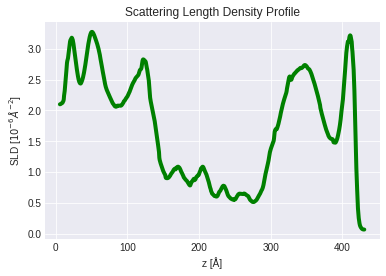

308


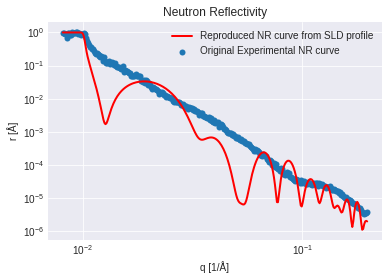

tensor(202272.)


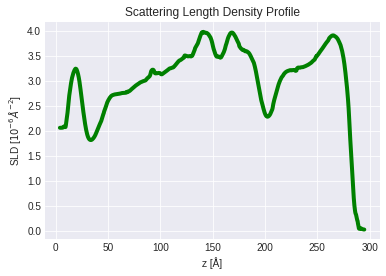

308


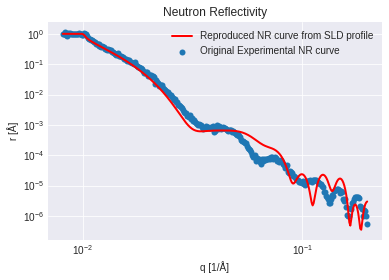

tensor(202461.)


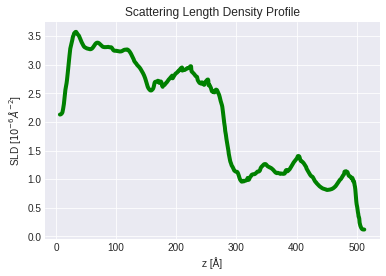

308


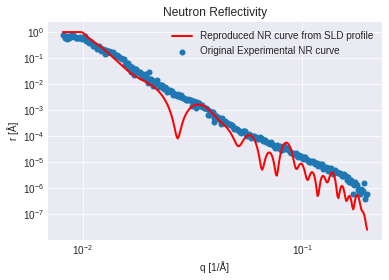

tensor(202406.)


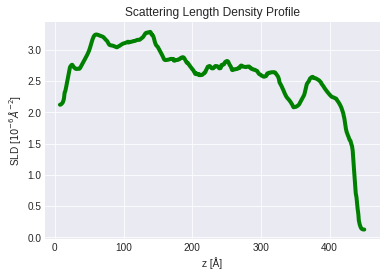

308


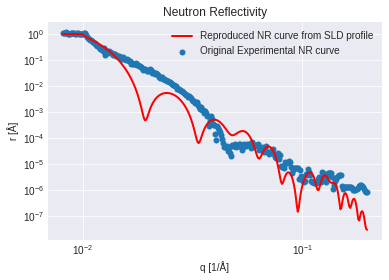

tensor(202454.)


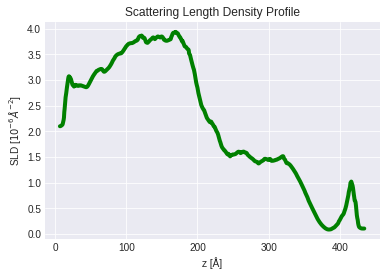

308


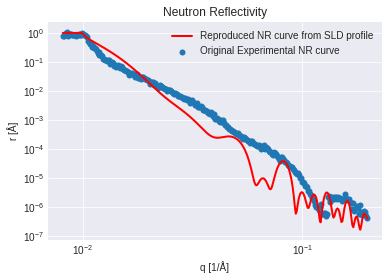

tensor(202342.)


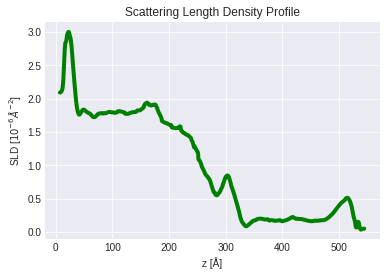

308


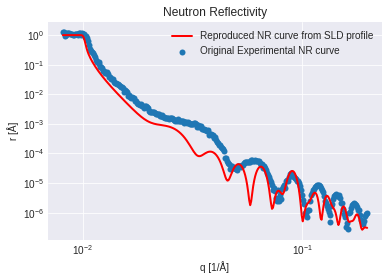

tensor(202394.)


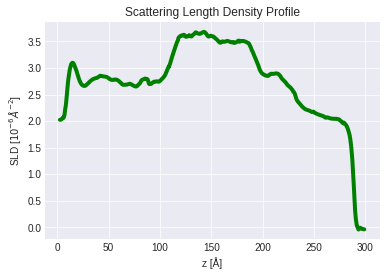

308


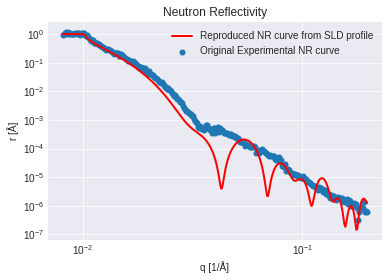

tensor(202293.)


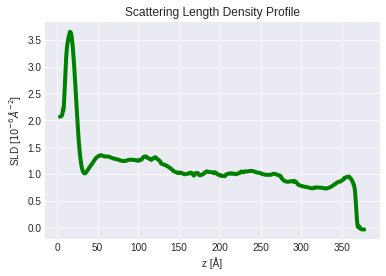

308


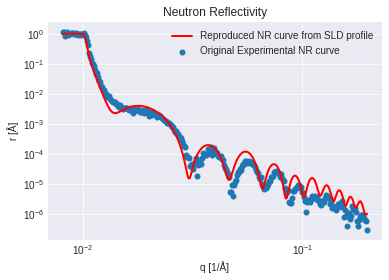

tensor(202279.)


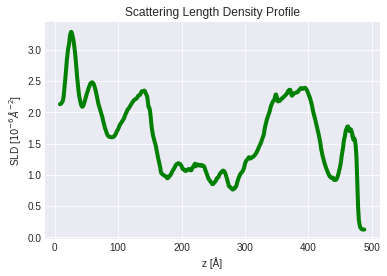

308


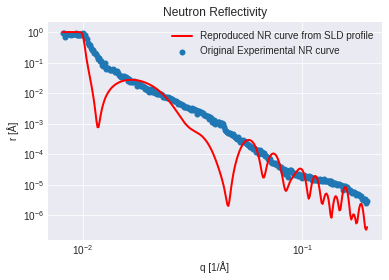

tensor(202253.)


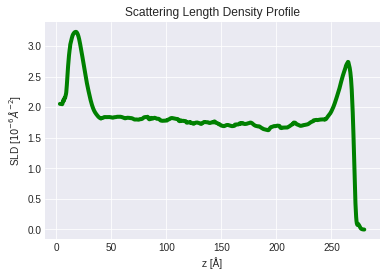

308


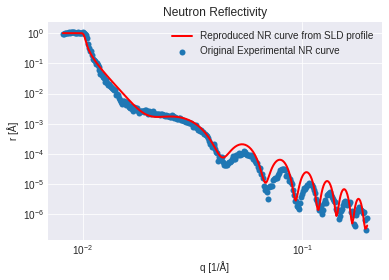

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
experimental = []
SLD_curves = []
for i in range(len(totalDataPoly)):
    experimental.append([])
    SLD_curves.append([])
    # for j in range(308):
    #     experimental[i].append(0)
# experimentalPlot = []
# for i in range(len(totalDataPoly)):
#     experimentalPlot.append([])
#     for j in range(308):
#         experimentalPlot[i].append(0)


    # experimental[i] = np.stack(experimental[i])
# experimental = np.stack(experimental)
# print(experimental.shape)
for first in range(1,6):
    for second in range(1,6):
        # if first == 5 and second >= 4:
        #     break
        with open('SLDRanges'+str(first)+str(second)+'.npy', 'rb') as f:
            min_valX, max_valX, min_valY, max_valY = np.load(f)
        Model = CNN(12)
        Model.load_state_dict(torch.load("./ModelPoly30000" + str(first) + str(second),map_location='cuda'))
        Model.eval()
        loss_fn = torch.nn.MSELoss()
        # model.to(device)
#         curves_nr = np.load('../NR-SLD_CurvesPoly30000' + str(first) + str(second) + '.npy')
#         curves_SLD = np.load('../SLD_CurvesPoly30000' + str(first) + str(second) + '.npy')
#         curves_nr = np.log10(curves_nr)

#         x_points = []
#         y_points = []
#         for curve in curves_nr:
#             x_points.append(curve[0])
#             y_points.append(curve[1])
#         min_valXNR = float('inf')
#         min_valYNR = float('inf')
#         max_valXNR = -float('inf')
#         max_valYNR = -float('inf')
#         for i in range(len(y_points)):
#             min_valXNR = min(min(x_points[i]), min_valXNR)
#             min_valYNR = min(min(y_points[i]), min_valYNR)
#             max_valXNR = max(max(x_points[i]), max_valXNR)
#             max_valYNR = max(max(y_points[i]), max_valYNR)
#         for i in range(len(y_points)):
#             for j in range(len(y_points[0])):
#                 x_points[i][j] -= min_valXNR
#                 y_points[i][j] -= min_valYNR
#                 x_points[i][j] /= (max_valXNR - min_valXNR)
#                 y_points[i][j] /= (max_valYNR - min_valYNR)
#         curves_nr2 = []
#         for i in range(len(y_points)):
#             curves_nr2.append([x_points[i],y_points[i]])
#         curves_nr2 = np.stack(curves_nr2)
#         curves_nr2.shape
#         x_points = []
#         y_points = []
#         for curve in curves_SLD:
#             x_points.append(curve[0].copy())
#             y_points.append(curve[1].copy())
#         min_valX = float('inf')
#         min_valY = float('inf')
#         max_valX = -float('inf')
#         max_valY= -float('inf')
#         for i in range(len(y_points)):
#             min_valX = min(min(x_points[i]), min_valX)
#             min_valY = min(min(y_points[i]), min_valY)
#             max_valX = max(max(x_points[i]), max_valX)
#             max_valY = max(max(y_points[i]), max_valY)
#         for i in range(len(y_points)):
#             for j in range(len(y_points[0])):
#                 x_points[i][j] -= min_valX
#                 y_points[i][j] -= min_valY
#                 x_points[i][j] /= (max_valX - min_valX)
#                 y_points[i][j] /= (max_valY - min_valY)
#         curves_SLD2 = []
#         for i in range(len(y_points)):
#             curves_SLD2.append([x_points[i],y_points[i]])
#         curves_SLD2 = np.stack(curves_SLD2)
        count = -1
#         Eval starts here
        for i in range(len(valid_datasetPoly)):
            count += 1
            data, label = valid_datasetPoly[i]
            data = data[:,np.newaxis,:].to(device)
            print(label[0])
            Model.eval().to(device)
            with torch.no_grad():
              decoded_img  = Model(data)
            for j in range(len(decoded_img[0][0])):
                # x_points[i][j] -= min_valX
                decoded_img[0][0][j] *= (max_valX - min_valX)
                decoded_img[0][0][j] += min_valX
                decoded_img[0][1][j] *= (max_valY- min_valY)
                decoded_img[0][1][j] += min_valY
            plt.style.use("seaborn-darkgrid")
            plt.plot(decoded_img.cpu()[0][0], decoded_img.cpu()[0][1], linewidth=4, color="g")
            plt.xlabel("z [Å]")
            plt.ylabel("SLD [$10^{-6}Å^{-2}$]")
            plt.title("Scattering Length Density Profile")
            # plt.savefig(str(int(label[0].item()))+ ' SLD Graph.jpeg')
            plt.show()

            a, r = calculate_reflectivity_from_profile(np.logspace(np.log10(0.008101436040354381), np.log10(0.1975709062238298), num=308), decoded_img.cpu()[0][0], decoded_img.cpu()[0][1])
            other = np.load("../Neutron_Reflect/npoutputsPoly/np_out_REFL_"+str(int(label[0].item()))+"_combined_data_auto.npy")
            yPoints = []
            xPoints = []
            for i in range(len(other)):
                xPoints.append(other[i][0])
                yPoints.append(other[i][1])
            print(len(other))
            # minValAdjustY = min(r)
            # adjust = binary_search(-minValAdjustY+1e-20,1,yPoints, r, 0)
            # print(adjust)
            # for j in range(len(r)):
            #     r[j] += adjust
            plt.plot(a, r, linewidth=2, color='r', label="Reproduced NR curve from SLD profile")

            plt.scatter(xPoints,yPoints, linewidth=0.01, label="Original Experimental NR curve")
            plt.xscale("log")
            # plt.plot(aLog, np.log10(r),linewidth=2, color='g', label="Reproduced NR curve from SLD profile")
            plt.xlabel("q [1/Å]")
            plt.ylabel("r [Å]")
            plt.title("Neutron Reflectivity")
            plt.yscale("log")
            plt.legend()
            # print(data)
            # plt.savefig(str(int(label[0].item()))+' Neutron Reflectivity Graph.jpeg')
            plt.show()
            # r2 = np.log10(r)
            # for j in range(len(r2)):
            #     # x_pointsPoly[i][j] -= min_valXNR
            #     r2[j] -= min_valYNR
            #     # x_pointsPoly[i][j] /= (max_valXNR - min_valXNR)
            #     r2[j] /= (max_valYNR - min_valYNR)
            # if r2_score(experimental[count], data.cpu().numpy()[0][0]) < r2_score(r2, data.cpu().numpy()[0][0]):
            #     experimental[count] = r2
            #     experimentalPlot[count] = r
            experimental[count].append(r)
            SLD_curves[count].append([decoded_img.cpu()[0][0], decoded_img.cpu()[0][1]])


        for i in range(len(train_datasetPoly)):
            count += 1
            data, label = train_datasetPoly[i]
            data = data[:,np.newaxis,:].to(device)
            Model.eval().to(device)
            print(label[0])
            with torch.no_grad():
              decoded_img  = Model(data)
              # decoded_img = decoded_img.reshape(-1,2, 308)
            for j in range(len(decoded_img[0][0])):
                # x_points[i][j] -= min_valX
                decoded_img[0][0][j] *= (max_valX - min_valX)
                decoded_img[0][0][j] += min_valX
                decoded_img[0][1][j] *= (max_valY- min_valY)
                decoded_img[0][1][j] += min_valY
            # if label[0] == 202349:
            #     plt.plot(decoded_img.cpu()[0][0],decoded_img.cpu()[0][1])
            #     np.save("File 202349_2d", decoded_img.cpu()[0])
            #     with open('SLD202349_2d.txt', 'a') as f:
            #         np.savetxt(f, decoded_img.cpu()[0])
            # if label[0] == 202356:
            # print(decoded_img[0][0].cpu().numpy())
            # if label[0] == 202454:
            plt.style.use("seaborn-darkgrid")
            plt.plot(decoded_img.cpu()[0][0], decoded_img.cpu()[0][1], linewidth=4, color="g")
            plt.xlabel("z [Å]")
            plt.ylabel("SLD [$10^{-6}Å^{-2}$]")
            plt.title("Scattering Length Density Profile")
            # plt.savefig(str(int(label[0].item()))+ ' SLD Graph.jpeg')
            plt.show()
            a, r = calculate_reflectivity_from_profile(np.logspace(np.log10(0.008101436040354381), np.log10(0.1975709062238298), num=308), decoded_img.cpu()[0][0], decoded_img.cpu()[0][1])
            other = np.load("../Neutron_Reflect/npoutputsPoly/np_out_REFL_"+str(int(label[0].item()))+"_combined_data_auto.npy")
            # # plt.plot(m.q,)
            yPoints = []
            xPoints = []
            for i in range(len(other)):
                xPoints.append(other[i][0])
                yPoints.append(other[i][1])
            print(len(other))
            # minValAdjustY = min(r)
            # adjust = binary_search(-minValAdjustY+1e-20,1,yPoints, r, 0)
            # print(adjust)
            # for j in range(len(r)):
            #     r[j] += adjust
            # yPointsLog = np.log10(yPoints)
            # rLog = np.log10(r)
            # adjust = binary_search(-1,1,yPointsLog,rLog,0)
            # for j in range(len(rLog)):
            #     rLog[j] += adjust
            # print(adjust)
            # xPointsLog = np.log10(xPoints)
            # aLog = np.log10(a)
            plt.plot(a, r, linewidth=2, color='r', label="Reproduced NR curve from SLD profile")

            plt.scatter(xPoints,yPoints, linewidth=0.01, label="Original Experimental NR curve")
            plt.xscale("log")
            # plt.plot(aLog, np.log10(r),linewidth=2, color='g', label="Reproduced NR curve from SLD profile")
            plt.xlabel("q [1/Å]")
            plt.ylabel("r [Å]")
            plt.title("Neutron Reflectivity")
            plt.yscale("log")
            plt.legend()
            # print(data)
            # plt.savefig(str(int(label[0].item()))+' Neutron Reflectivity Graph.jpeg')
            plt.show()

#             r2 = np.log10(r)


#             for i in range(len(r2)):
#                 # x_pointsPoly[i][j] -= min_valXNR
#                 r2[i] -= min_valYNR
#                 # x_pointsPoly[i][j] /= (max_valXNR - min_valXNR)
#                 r2[i] /= (max_valYNR - min_valYNR)
#             if r2_score(experimental[count], data.cpu().numpy()[0][0]) < r2_score(r2, data.cpu().numpy()[0][0]):
#                 experimental[count] = r2
#                 experimentalPlot[count] = r
            experimental[count].append(r)
            SLD_curves[count].append([decoded_img.cpu()[0][0], decoded_img.cpu()[0][1]])

        for i in range(len(test_datasetPoly)):
            count += 1
            data, label = test_datasetPoly[i]
            data = data[:,np.newaxis,:].to(device)
            Model.eval().to(device)
            print(label[0])
            with torch.no_grad():
              decoded_img  = Model(data)
              # decoded_img = decoded_img.reshape(-1,2, 308)
            for j in range(len(decoded_img[0][0])):
                # x_points[i][j] -= min_valX
                decoded_img[0][0][j] *= (max_valX - min_valX)
                decoded_img[0][0][j] += min_valX
                decoded_img[0][1][j] *= (max_valY- min_valY)
                decoded_img[0][1][j] += min_valY
            # if label[0] == 202349:
            #     plt.plot(decoded_img.cpu()[0][0],decoded_img.cpu()[0][1])
            #     np.save("File 202349_2d", decoded_img.cpu()[0])
            #     with open('SLD202349_2d.txt', 'a') as f:
            #         np.savetxt(f, decoded_img.cpu()[0])
            # if label[0] == 202356:
            # print(decoded_img[0][0].cpu().numpy())
            # if label[0] == 202454:
            plt.style.use("seaborn-darkgrid")
            plt.plot(decoded_img.cpu()[0][0], decoded_img.cpu()[0][1], linewidth=4, color="g")
            plt.xlabel("z [Å]")
            plt.ylabel("SLD [$10^{-6}Å^{-2}$]")
            plt.title("Scattering Length Density Profile")
            # plt.savefig(str(int(label[0].item())) + ' SLD Graph.jpeg')
            plt.show()
            a, r = calculate_reflectivity_from_profile(np.logspace(np.log10(0.008101436040354381), np.log10(0.1975709062238298), num=308), decoded_img.cpu()[0][0], decoded_img.cpu()[0][1])
            other = np.load("../Neutron_Reflect/npoutputsPoly/np_out_REFL_"+str(int(label[0].item()))+"_combined_data_auto.npy")
            # # plt.plot(m.q,)
            yPoints = []
            xPoints = []
            for i in range(len(other)):
                xPoints.append(other[i][0])
                yPoints.append(other[i][1])
            print(len(other))
            # yPointsLog = np.log10(yPoints)
            # rLog = np.log10(r)
            # adjust = binary_search(-1,1,yPointsLog,rLog,0)
            # for j in range(len(rLog)):
            #     rLog[j] += adjust
            # print(adjust)
            # xPointsLog = np.log10(xPoints)
            # aLog = np.log10(a)
            # minValAdjustY = min(r)
            # adjust = binary_search(-minValAdjustY+1e-20,1,yPoints, r, 0,xPoints)
            # print(adjust)
            # for j in range(len(r)):
            #     r[j] += adjust
            plt.plot(a, r, linewidth=2, color='r', label="Reproduced NR curve from SLD profile")

            plt.scatter(xPoints,yPoints, linewidth=0.01, label="Original Experimental NR curve")
            plt.xscale("log")
            # plt.plot(aLog, np.log10(r),linewidth=2, color='g', label="Reproduced NR curve from SLD profile")
            plt.xlabel("q [1/Å]")
            plt.ylabel("r [Å]")
            plt.title("Neutron Reflectivity")
            plt.yscale("log")
            plt.legend()
            # print(data)
            # plt.savefig(str(int(label[0].item()))+' Neutron Reflectivity Graph.jpeg')
            plt.show()

#             r2 = np.log10(r)

#             for i in range(len(r2)):
#                 # x_pointsPoly[i][j] -= min_valXNR
#                 r2[i] -= min_valYNR
#                 # x_pointsPoly[i][j] /= (max_valXNR - min_valXNR)
#                 r2[i] /= (max_valYNR - min_valYNR)
#             if r2_score(experimental[count], data.cpu().numpy()[0][0]) < r2_score(r2, data.cpu().numpy()[0][0]):
#                 experimental[count] = r2
#                 experimentalPlot[count] = r
            experimental[count].append(r)
            SLD_curves[count].append([decoded_img.cpu()[0][0], decoded_img.cpu()[0][1]])



In [ ]:
count = -1
for i in range(len(valid_datasetPoly)):
    count += 1
    data, label = valid_datasetPoly[i]
    # if label[0] == 202454:
    other = np.load("../Neutron_Reflect/npoutputsPoly/np_out_REFL_"+str(int(label[0].item()))+"_combined_data_auto.npy")
    # # plt.plot(m.q,)
    yPoints = []
    xPoints = []
    print(label[0])
    for j in range(len(other)):
        xPoints.append(other[j][0])
        yPoints.append(other[j][1])
    for j in range(len(experimental[0])):
        first = (j-1)%5+1
        second = j-(first-1)*5
        plt.scatter(xPoints, yPoints, linewidth=0.01, label="Original Experimental NR curve")
        plt.plot(np.logspace(np.log10(0.008101436040354381), np.log10(0.1975709062238298), num=308),experimental[count][j], linewidth=2, color='c', label=str(first)+str(second))
        plt.xlabel("q [1/Å]")
        plt.ylabel("r [Å]")
        plt.title("Neutron Reflectivity")
        plt.yscale("log")
        plt.xscale('log')
        plt.legend()
        plt.show()

for i in range(len(train_datasetPoly)):
    count += 1
    data, label = train_datasetPoly[i]
    # if label[0] == 202454:
    other = np.load("../Neutron_Reflect/npoutputsPoly/np_out_REFL_"+str(int(label[0].item()))+"_combined_data_auto.npy")
    # # plt.plot(m.q,)
    print(label[0])

    yPoints = []
    xPoints = []
    for i in range(len(other)):
        xPoints.append(other[i][0])
        yPoints.append(other[i][1])
    for j in range(len(experimental[0])):
        first = (j-1)%5+1
        second = j-(first-1)*5
        plt.scatter(xPoints, yPoints, linewidth=0.01, label="Original Experimental NR curve")
        plt.plot(np.logspace(np.log10(0.008101436040354381), np.log10(0.1975709062238298), num=308),experimental[count][j], linewidth=2, color='c', label=str(first)+str(second))
        plt.xlabel("q [1/Å]")
        plt.ylabel("r [Å]")
        plt.title("Neutron Reflectivity")
        plt.yscale("log")
        plt.xscale('log')
        plt.legend()
        plt.show()

for i in range(len(test_datasetPoly)):
    count += 1
    data, label = test_datasetPoly[i]
    # if label[0] == 202454:
    other = np.load("../Neutron_Reflect/npoutputsPoly/np_out_REFL_"+str(int(label[0].item()))+"_combined_data_auto.npy")
    # # plt.plot(m.q,)
    yPoints = []
    xPoints = []
    print(label[0])

    for i in range(len(other)):
        xPoints.append(other[i][0])
        yPoints.append(other[i][1])
    for j in range(len(experimental[0])):
        first = (j-1)%5+1
        second = j-(first-1)*5
        plt.scatter(xPoints, yPoints, linewidth=0.01, label="Original Experimental NR curve")
        plt.plot(np.logspace(np.log10(0.008101436040354381), np.log10(0.1975709062238298), num=308),experimental[count][j], linewidth=2, color='c', label=str(first)+str(second))
        plt.xlabel("q [1/Å]")
        plt.ylabel("r [Å]")
        plt.title("Neutron Reflectivity")
        plt.yscale("log")
        plt.xscale('log')
        plt.legend()
        plt.show()

In [ ]:
count = -1
import math
from sklearn.decomposition import PCA
for i in range(len(valid_datasetPoly)):
    count += 1
    data, label = valid_datasetPoly[i]
    # if label[0] == 202454:
    other = np.load("../Neutron_Reflect/npoutputsPoly/np_out_REFL_"+str(int(label[0].item()))+"_combined_data_auto.npy")
    # # plt.plot(m.q,)
    yPoints = []
    xPoints = []
    print(label[0])
    for j in range(len(other)):
        xPoints.append(other[j][0])
        yPoints.append(other[j][1])
    for j in range(len(experimental[0])):
        plt.plot(SLD_curves[count][j][0], SLD_curves[count][j][1], linewidth=4, color="g")
        plt.xlabel("z [Å]")
        plt.ylabel("SLD [$10^{-6}Å^{-2}$]")
        plt.title("Scattering Length Density Profile")
        # plt.savefig(str(int(label[0].item()))+ ' SLD Graph.jpeg')
        plt.show()
        second = int((j)%5)
        first = int((j-(second))/5)
        plt.plot()
        plt.scatter(xPoints, yPoints, linewidth=0.01, label="Original Experimental NR curve")
        plt.plot(np.logspace(np.log10(0.008101436040354381), np.log10(0.1975709062238298), num=308),experimental[count][j], linewidth=2, color='c', label=str(first+1)+str(second+1))
        plt.xlabel("q [1/Å]")
        plt.ylabel("r [Å]")
        plt.title("Neutron Reflectivity")
        plt.yscale("log")
        plt.xscale('log')
        plt.legend()
        plt.show()

for i in range(len(train_datasetPoly)):
    count += 1
    data, label = train_datasetPoly[i]
    # if label[0] == 202454:
    other = np.load("../Neutron_Reflect/npoutputsPoly/np_out_REFL_"+str(int(label[0].item()))+"_combined_data_auto.npy")
    # # plt.plot(m.q,)
    print(label[0])

    yPoints = []
    xPoints = []
    for i in range(len(other)):
        xPoints.append(other[i][0])
        yPoints.append(other[i][1])
    for j in range(len(experimental[0])):
        plt.plot(SLD_curves[count][j][0], SLD_curves[count][j][1], linewidth=4, color="g")
        plt.xlabel("z [Å]")
        plt.ylabel("SLD [$10^{-6}Å^{-2}$]")
        plt.title("Scattering Length Density Profile")
        # plt.savefig(str(int(label[0].item()))+ ' SLD Graph.jpeg')
        plt.show()
        second = int((j)%5)
        first = int((j-(second))/5)
        plt.scatter(xPoints, yPoints, linewidth=0.01, label="Original Experimental NR curve")
        plt.plot(np.logspace(np.log10(0.008101436040354381), np.log10(0.1975709062238298), num=308),experimental[count][j], linewidth=2, color='c', label=str(first+1)+str(second+1))
        plt.xlabel("q [1/Å]")
        plt.ylabel("r [Å]")
        plt.title("Neutron Reflectivity")
        plt.yscale("log")
        plt.xscale('log')
        plt.legend()
        plt.show()

for i in range(len(test_datasetPoly)):
    count += 1
    data, label = test_datasetPoly[i]
    # if label[0] == 202454:
    other = np.load("../Neutron_Reflect/npoutputsPoly/np_out_REFL_"+str(int(label[0].item()))+"_combined_data_auto.npy")
    # # plt.plot(m.q,)
    yPoints = []
    xPoints = []
    print(label[0])

    for i in range(len(other)):
        xPoints.append(other[i][0])
        yPoints.append(other[i][1])
    for j in range(len(experimental[0])):
        plt.plot(SLD_curves[count][j][0], SLD_curves[count][j][1], linewidth=4, color="g")
        plt.xlabel("z [Å]")
        plt.ylabel("SLD [$10^{-6}Å^{-2}$]")
        plt.title("Scattering Length Density Profile")
        # plt.savefig(str(int(label[0].item()))+ ' SLD Graph.jpeg')
        plt.show()
        second = int((j)%5)
        first = int((j-(second))/5)
        plt.scatter(xPoints, yPoints, linewidth=0.01, label="Original Experimental NR curve")
        plt.plot(np.logspace(np.log10(0.008101436040354381), np.log10(0.1975709062238298), num=308),experimental[count][j], linewidth=2, color='c', label=str(first+1)+str(second+1))
        plt.xlabel("q [1/Å]")
        plt.ylabel("r [Å]")
        plt.title("Neutron Reflectivity")
        plt.yscale("log")
        plt.xscale('log')
        plt.legend()
        plt.show()

In [ ]:
print(len(valid_datasetPoly), len(train_datasetPoly), len(test_datasetPoly))

In [ ]:
def plotter(label, SLD, experimental):
    plt.plot(SLD[0], SLD[1], linewidth=4, color="g")
    plt.xlabel("z [Å]")
    plt.ylabel("SLD [$10^{-6}Å^{-2}$]")
    plt.title("Scattering Length Density Profile")
    plt.savefig(str(int(label[0].item()))+ ' SLD Graph.jpeg')
    plt.show()
    plt.scatter(xPoints, yPoints, linewidth=0.01, label="Original Experimental NR curve")
    plt.plot(np.logspace(np.log10(0.008101436040354381), np.log10(0.1975709062238298), num=308),experimental, linewidth=2, color='r', label=str(first)+str(second))
    plt.xlabel("q [1/Å]")
    plt.ylabel("r [Å]")
    plt.title("Neutron Reflectivity")
    plt.yscale("log")
    plt.xscale('log')
    plt.legend()
    plt.savefig(str(int(label[0].item())) + ' Neutron Reflectivity Graph.jpeg')
    plt.show()
    np.save(str(int(label[0].item()))+ ' SLD Graph.npy', [SLD[0].numpy(), SLD[1].numpy()])
    np.save(str(int(label[0].item())) + ' Neutron Reflectivity Graph.npy', [np.logspace(np.log10(0.008101436040354381), np.log10(0.1975709062238298), num=308),experimental])

In [ ]:
count = -1
import math
# from sklearn.decomposition import PCA
for i in range(len(valid_datasetPoly)):
    count += 1
    data, label = valid_datasetPoly[i]
    other = np.load("../Neutron_Reflect/npoutputsPoly/np_out_REFL_"+str(int(label[0].item()))+"_combined_data_auto.npy")
    # # plt.plot(m.q,)
    yPoints = []
    xPoints = []
    print(int(label[0].item()))
    
    for j in range(len(other)):
        xPoints.append(other[j][0])
        yPoints.append(other[j][1])
    for j in range(len(experimental[0])):
        second = int((j)%5)
        first = int((j-(second))/5)
        first += 1
        second += 1
        # print(int(label[0].item()), first, second)
        if int(label[0].item()) == 202382 and first == 5 and second == 3:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202300 and first == 5 and second == 5:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202394 and first == 4 and second == 5:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202293 and first == 4 and second == 2:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202413 and first == 4 and second == 2:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202349 and first == 3 and second == 1:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202369 and first == 3 and second == 1:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202314 and first == 3 and second == 3:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202286 and first == 5 and second == 2:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202468 and first == 2 and second == 3:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202279 and first == 2 and second == 5:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202461 and first == 2 and second == 2:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202272 and first == 3 and second == 1:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202437 and first == 3 and second == 1:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202454 and first == 1 and second == 4:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202356 and first == 3 and second == 1:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202425 and first == 4 and second == 1:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202307 and first == 3 and second == 2:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202253 and first == 3 and second == 2:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202265 and first == 3 and second == 4:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202342 and first == 3 and second == 2:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202406 and first == 4 and second == 2:
            plotter(label, SLD_curves[count][j], experimental[count][j])
            

for i in range(len(train_datasetPoly)):
    count += 1
    data, label = train_datasetPoly[i]
    # if label[0] == 202454:
    other = np.load("../Neutron_Reflect/npoutputsPoly/np_out_REFL_"+str(int(label[0].item()))+"_combined_data_auto.npy")
    # # plt.plot(m.q,)
    print(label[0])

    yPoints = []
    xPoints = []
    for i in range(len(other)):
        xPoints.append(other[i][0])
        yPoints.append(other[i][1])
    for j in range(len(experimental[0])):
        second = int((j)%5)
        first = int((j-(second))/5)
        first += 1
        second += 1
        if int(label[0].item()) == 202382 and first == 5 and second == 3:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202300 and first == 5 and second == 5:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202394 and first == 4 and second == 5:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202293 and first == 4 and second == 2:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202413 and first == 4 and second == 2:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202349 and first == 3 and second == 1:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202369 and first == 3 and second == 1:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202314 and first == 3 and second == 3:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202286 and first == 5 and second == 2:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202468 and first == 2 and second == 3:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202279 and first == 2 and second == 5:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202461 and first == 2 and second == 2:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202272 and first == 3 and second == 1:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202437 and first == 3 and second == 1:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202454 and first == 1 and second == 4:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202356 and first == 3 and second == 1:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202425 and first == 4 and second == 1:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202307 and first == 3 and second == 2:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202253 and first == 3 and second == 2:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202265 and first == 3 and second == 4:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202342 and first == 3 and second == 2:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202406 and first == 4 and second == 2:
            plotter(label, SLD_curves[count][j], experimental[count][j])
for i in range(len(test_datasetPoly)):
    count += 1
    data, label = test_datasetPoly[i]
    # if label[0] == 202454:
    other = np.load("../Neutron_Reflect/npoutputsPoly/np_out_REFL_"+str(int(label[0].item()))+"_combined_data_auto.npy")
    # # plt.plot(m.q,)
    yPoints = []
    xPoints = []
    print(label[0])
    for i in range(len(other)):
        xPoints.append(other[i][0])
        yPoints.append(other[i][1])
    for j in range(len(experimental[0])):
        second = int((j)%5)
        first = int((j-(second))/5)
        first += 1
        second += 1
        if int(label[0].item()) == 202382 and first == 5 and second == 3:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202300 and first == 5 and second == 5:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202394 and first == 4 and second == 5:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202293 and first == 4 and second == 2:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202413 and first == 4 and second == 2:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202349 and first == 3 and second == 1:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202369 and first == 3 and second == 1:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202314 and first == 3 and second == 3:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202286 and first == 5 and second == 2:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202468 and first == 2 and second == 3:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202279 and first == 2 and second == 5:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202461 and first == 2 and second == 2:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202272 and first == 3 and second == 1:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202437 and first == 3 and second == 1:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202454 and first == 1 and second == 4:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202356 and first == 3 and second == 1:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202425 and first == 4 and second == 1:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202307 and first == 3 and second == 2:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202253 and first == 3 and second == 2:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202265 and first == 3 and second == 4:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202342 and first == 3 and second == 2:
            plotter(label, SLD_curves[count][j], experimental[count][j])
        if int(label[0].item()) == 202406 and first == 4 and second == 2:
            plotter(label, SLD_curves[count][j], experimental[count][j])